### Exploring the Star Wars survey to analyze the popularity of various Star Wars movies

#### Objective - A survey was conducted across 1185 correspondents to understand their views on different movies of the Star Wars franchise. We will aim to figure out what makes certain Star Wars movies more popular than others, based on the Survey results. 

In [1]:
import pandas as pd

In [2]:
star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')

In [3]:
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             
3    3292763116                                                Yes             
4    3292731220                                                Yes             
5    3292719380                                                Yes             
6    3292684787                                                Yes             
7    3292663732                                                Yes             
8    3292654043                                                Yes             
9    3292640424                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
import re

In [6]:
#Filtering all the columns which have 'Unnamed' in them
cols_unnamed = [col for col in star_wars.columns if re.search('Unnamed', col) ]

In [7]:
star_wars[cols_unnamed].head()

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,2.0,1.0,4.0,5.0,6.0,...,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,2.0,3.0,4.0,5.0,6.0,...,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,1.0,2.0,4.0,3.0,...,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
4,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,6.0,2.0,1.0,3.0,...,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


#### It appears like these columns were responses to certain questions, where more than one responses were allowed.

In [8]:
for col in cols_unnamed:
    value_counts = star_wars[col].value_counts(dropna = False)
    print('The value counts for the column \'', col,'\'are')
    print('\n')
    print(value_counts)
    print('\n')

The value counts for the column ' Unnamed: 4 'are


NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64


The value counts for the column ' Unnamed: 5 'are


NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64


The value counts for the column ' Unnamed: 6 'are


Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64


The value counts for the column ' Unnamed: 7 'are


Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64


The value counts for the column ' Unnamed: 8 'are


Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64


The value counts for the column ' Unnamed: 10 'are


NaN    350
5.0    300
4.0    183
2.0

In [9]:
cols_not_unnamed = [col for col in star_wars.columns if col not in cols_unnamed]

In [10]:
for col in cols_not_unnamed:
    value_counts = star_wars[col].value_counts(dropna = False)
    print('The value counts for the column \'', col,'\'are')
    print('\n')
    print(value_counts)
    print('\n')

The value counts for the column ' RespondentID 'are


3289878528    1
3291141478    1
3288559700    1
3290047842    1
3291430239    1
             ..
3291476650    1
3290561192    1
3289553574    1
3289725605    1
3289370623    1
Name: RespondentID, Length: 1186, dtype: int64


The value counts for the column ' Have you seen any of the 6 films in the Star Wars franchise? 'are


Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


The value counts for the column ' Do you consider yourself to be a fan of the Star Wars film franchise? 'are


Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


The value counts for the column ' Which of the following Star Wars films have you seen? Please select all that apply. 'are


Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you see

#### We will analyze and clean the below columns containing Yes / No answers:

- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

In [11]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [12]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].dtype

dtype('O')

In [13]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [14]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].dtype

dtype('O')

#### We can transform the data in these columns to make them of 'Boolean' data type. 'Yes' can become 'True and 'No' can become 'False'. Conversion to Boolean Data for these values will allow for faster analysis. 

In [15]:
### Creating a mapping dictionary to transform the data

dict_map_yes_no = {'Yes' : True, 'No': False}

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(dict_map_yes_no)
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False))

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [16]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(dict_map_yes_no)
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [17]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].dtype

dtype('bool')

In [18]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].dtype

dtype('bool')

#### Thus we have transformed the data in the Yes/No columns into 'Boolean' data type. Now we proceed towards cleaning other columns

In [19]:
for col in star_wars.columns[3:9]:
    print(col)
    print(star_wars[col].value_counts(dropna = False))
    print('\n')

Which of the following Star Wars films have you seen? Please select all that apply.
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


Unnamed: 4
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64


Unnamed: 5
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64


Unnamed: 6
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64


Unnamed: 7
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64


Unnamed: 8
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64




In [20]:
import numpy as np

for col in star_wars.columns[3:9]:
    print(col)
    value_counts_series = star_wars[col].value_counts(dropna = False)
    series_index = list(value_counts_series.index)
    mapping_dict = {}
    for item in series_index:
        if str(item) == 'nan':
            mapping_dict[item] = False
        else:
            mapping_dict[item] = True
    star_wars[col] = star_wars[col].map(mapping_dict)
    print('\n')
    print(star_wars[col].value_counts(dropna = False))
    print('Checking if the values have been converted into True/False values or not')
    print(star_wars[col].value_counts())

    
    

Which of the following Star Wars films have you seen? Please select all that apply.


True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
Checking if the values have been converted into True/False values or not
True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
Unnamed: 4


False    615
True     571
Name: Unnamed: 4, dtype: int64
Checking if the values have been converted into True/False values or not
False    615
True     571
Name: Unnamed: 4, dtype: int64
Unnamed: 5


False    636
True     550
Name: Unnamed: 5, dtype: int64
Checking if the values have been converted into True/False values or not
False    636
True     550
Name: Unnamed: 5, dtype: int64
Unnamed: 6


True     607
False    579
Name: Unnamed: 6, dtype: int64
Checking if the values have been converted into True/False values or not
True     607
False    579
Name: Unname

#### Now that all the values in these columns have been converted into Boolean types, we will rename the columns so that the names become more intuitive. The columns will be named based on the Star Wars sequel. Eg - the column referring to Episode 1 will be renamed to seen_1 and so on and so forth. 

In [21]:
movie_seen = [col for col in star_wars.columns[3:9]]

In [22]:
movie_seen

['Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8']

In [23]:
movie_seen_replace = ['seen_{}'.format(i) for i in range(1,7)]

In [24]:
movie_seen_replace

['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

In [25]:
dict_col_rename = dict(zip(movie_seen, movie_seen_replace))

In [26]:
dict_col_rename

{'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
 'Unnamed: 4': 'seen_2',
 'Unnamed: 5': 'seen_3',
 'Unnamed: 6': 'seen_4',
 'Unnamed: 7': 'seen_5',
 'Unnamed: 8': 'seen_6'}

In [27]:
star_wars = star_wars.rename(columns = dict_col_rename)

In [28]:
for col in star_wars.columns[3:9]:
    print(col)

seen_1
seen_2
seen_3
seen_4
seen_5
seen_6


#### Thus the checkbox columns have also been renamed and converted to boolean data type to enable faster analysis. Checking the next set of columns for cleaning. 

In [29]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you 

#### Thus we can observe that the next few columns are about ranking of the star wars movies based on the respondent's personal preference. We will analyze the columns' data and decide on appropriate cleaning strategies. 

In [30]:
for col in star_wars.columns[9:15]:
    #print('COLUMN NAME')
    print(col)
    #print('COLUMN VALUE COUNTS')
    print(star_wars[col].value_counts(dropna = False))
    print(star_wars[col].isnull().sum())
    print('\n')

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
NaN    351
4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64
351


Unnamed: 10
NaN    350
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: Unnamed: 10, dtype: int64
350


Unnamed: 11
NaN    351
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: Unnamed: 11, dtype: int64
351


Unnamed: 12
NaN    350
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: Unnamed: 12, dtype: int64
350


Unnamed: 13
NaN    350
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: Unnamed: 13, dtype: int64
350


Unnamed: 14
NaN    350
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: Unnamed: 1

#### Observation of the data in the ranking columns suggests that they don't require much cleaning. We will only convert the data type to float and rename the columns to something like ranking_1, ranking_2 etc. (As they indicate the user rankings for each sequel)

In [31]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)  


In [32]:
#Checking if the data types have been converted
for col in star_wars.columns[9:15]:
    #print('COLUMN NAME')
    print(col)
    print(star_wars[col].dtype)

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
float64
Unnamed: 10
float64
Unnamed: 11
float64
Unnamed: 12
float64
Unnamed: 13
float64
Unnamed: 14
float64


In [33]:
ranking_list = ['ranking_{}'.format(i) for i in range(1,7)]

In [34]:
ranking_columns_list = [col for col in star_wars.columns[9:15]]

In [35]:
ranking_columns_list

['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14']

In [36]:
ranking_map_dict = dict(zip(ranking_columns_list, ranking_list))

In [37]:
star_wars = star_wars.rename(columns = ranking_map_dict )

In [38]:
#Checking if the column names and data types have been changed
for col in star_wars.columns[9:15]:
    #print('COLUMN NAME')
    print(col)
    print(star_wars[col].dtype)

ranking_1
float64
ranking_2
float64
ranking_3
float64
ranking_4
float64
ranking_5
float64
ranking_6
float64


#### Thus we have cleaned the columns indicating the rankings of the Star Wars movies. Analyzing the next set of columns. 

In [39]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

In [40]:
star_wars[star_wars.columns[15:29]].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [41]:
for col in star_wars.columns[15:29]:
    #print('COLUMN NAME')
    print(col)
    #print('COLUMN VALUE COUNTS')
    print(star_wars[col].value_counts(dropna = False))
    print(star_wars[col].isnull().sum())
    print('\n')

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.
Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64
357


Unnamed: 16
Very favorably                                 552
NaN                                            355
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Name: Unnamed: 16, dtype: 

#### Most likely these columns describe the user preferences for certain Star Wars characters. Since the character names are not known, we will not consider these columns. We will instead look for insights from the already cleaned columns. 

### Finding the highest ranked Star Wars sequel

In [51]:
mean_rankings = star_wars[star_wars.columns[9:15]].mean()

In [43]:
print(mean_rankings.sort_values())

ranking_5    2.513158
ranking_6    3.047847
ranking_4    3.272727
ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
dtype: float64


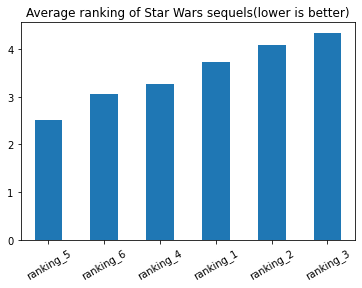

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
mean_rankings.sort_values().plot.bar()
plt.xticks(rotation = 30)
plt.title('Average ranking of Star Wars sequels(lower is better)')
plt.show()

#### Thus we can observe that Episode 5 is the highest ranked while Episode 3 is the lowest ranked. This could also be due to a general perception among Star Wars fans that Episodes 4-6 were better in comparision to Episodes 1-3. 

### Finding the most viewed sequel

In [45]:
total_views = star_wars[star_wars.columns[3:9]].sum()

In [46]:
print(total_views.sort_values(ascending = False))

seen_5    758
seen_6    738
seen_1    673
seen_4    607
seen_2    571
seen_3    550
dtype: int64


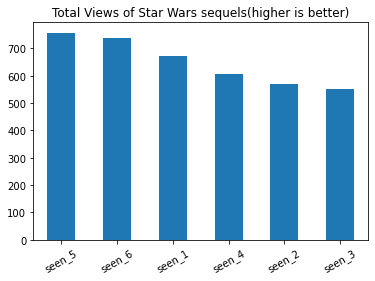

In [47]:
%matplotlib inline
total_views.sort_values(ascending = False).plot.bar()
plt.xticks(rotation = 30)
plt.title('Total Views of Star Wars sequels(higher is better)')
plt.show()

#### Thus we can observe that Episode 5 and Episode 6 have the highest views. Episode 1 may have had very high views due to the hype as it was the first Star Wars sequel in close to two decades. Then as the viewers (most likely) didn't like it, the views for Episodes 2 and 3 went down further. This reinforces the view that Episodes 4-6 were considered better than Episodes 1-3, based on the rankings analysis.

### Exploring the Data by a Binary Segment - Gender

#### We will split the entire dataset into two groups one for male respondents and another for female respondents, and analyze the movie rankings and views for each group separately

In [49]:
star_wars['Gender'].value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

In [50]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

### Finding the highest ranked Star Wars sequel among the male audiences

In [52]:
mean_rankings_males = males[males.columns[9:15]].mean()

In [53]:
print(mean_rankings_males.sort_values())

ranking_5    2.458629
ranking_4    2.997636
ranking_6    3.002364
ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
dtype: float64


In [56]:
mean_rankings_females = females[females.columns[9:15]].mean()

In [57]:
print(mean_rankings_females.sort_values())

ranking_5    2.569270
ranking_6    3.078086
ranking_1    3.429293
ranking_4    3.544081
ranking_2    3.954660
ranking_3    4.418136
dtype: float64


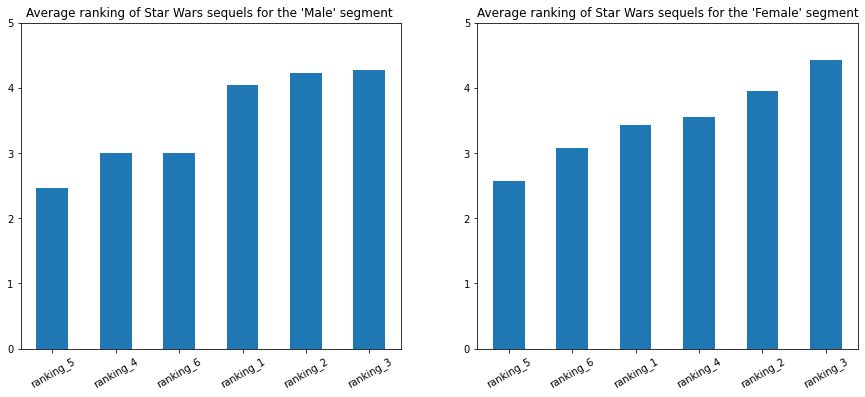

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
mean_rankings_males.sort_values().plot.bar()
plt.xticks(rotation = 30)
plt.title('Average ranking of Star Wars sequels for the \'Male\' segment ')
plt.ylim([0,5])
#plt.show()

plt.subplot(1,2,2)
mean_rankings_females.sort_values().plot.bar()
plt.xticks(rotation = 30)
plt.title('Average ranking of Star Wars sequels for the \'Female\' segment')
plt.ylim([0,5])
plt.show()


#### Thus we can observe that Episode 5 is the highest ranked for both the gender segments. For Female audiences, while the ranking for episode 4 is lower than the ranking for Episode 1, the difference is marginal. Thus we can consider even for Female audiences, the Original Star Wars movies are perceived to be better. There could be a bias due to the novelty of Episode 1. 

### Finding the most viewed sequel among both the gender segments

In [67]:
total_views_male = males[males.columns[3:9]].sum()

In [68]:
print(total_views_male.sort_values(ascending = False))

seen_5    392
seen_6    387
seen_1    361
seen_4    342
seen_2    323
seen_3    317
dtype: int64


In [69]:
total_views_female = females[females.columns[3:9]].sum()

In [70]:
print(total_views_female.sort_values(ascending = False))

seen_5    353
seen_6    338
seen_1    298
seen_4    255
seen_2    237
seen_3    222
dtype: int64


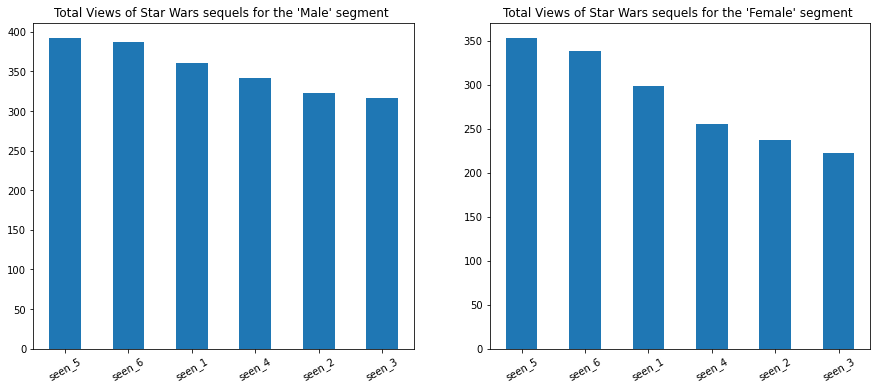

In [72]:
%matplotlib inline

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
total_views_male.sort_values(ascending = False).plot.bar()
plt.xticks(rotation = 30)
plt.title('Total Views of Star Wars sequels for the \'Male\' segment ')
#plt.ylim([0,5])
#plt.show()

plt.subplot(1,2,2)
total_views_female.sort_values(ascending = False).plot.bar()
plt.xticks(rotation = 30)
plt.title('Total Views of Star Wars sequels for the \'Female\' segment ')
#plt.ylim([0,5])
plt.show()

#### Thus we can observe that the total number of views are ranked in the same order. It is because most likely people would have watched these movies in mixed gender groups rather than alone. Since the movies are action / sci-fi oriented, the primary audience would have been male and they may have brought their female friends along. 

## Thank You !